# K-means & E-M Algotithm

## Abstract

Is the code of the implementation of EM algorithm.

## Content

### Code K-means examples

In [58]:
import numpy as np

from sklearn.datasets import make_blobs

n_samples = 1500
random_state = 170
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]

X, y = make_blobs(n_samples=n_samples, random_state=random_state)
X_aniso = np.dot(X, transformation)  # Anisotropic blobs
X_varied, y_varied = make_blobs(
    n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5], random_state=random_state
)  # Unequal variance
X_filtered = np.vstack(
    (X[y == 0][:500], X[y == 1][:100], X[y == 2][:10])
)  # Unevenly sized blobs
y_filtered = [0] * 500 + [1] * 100 + [2] * 10

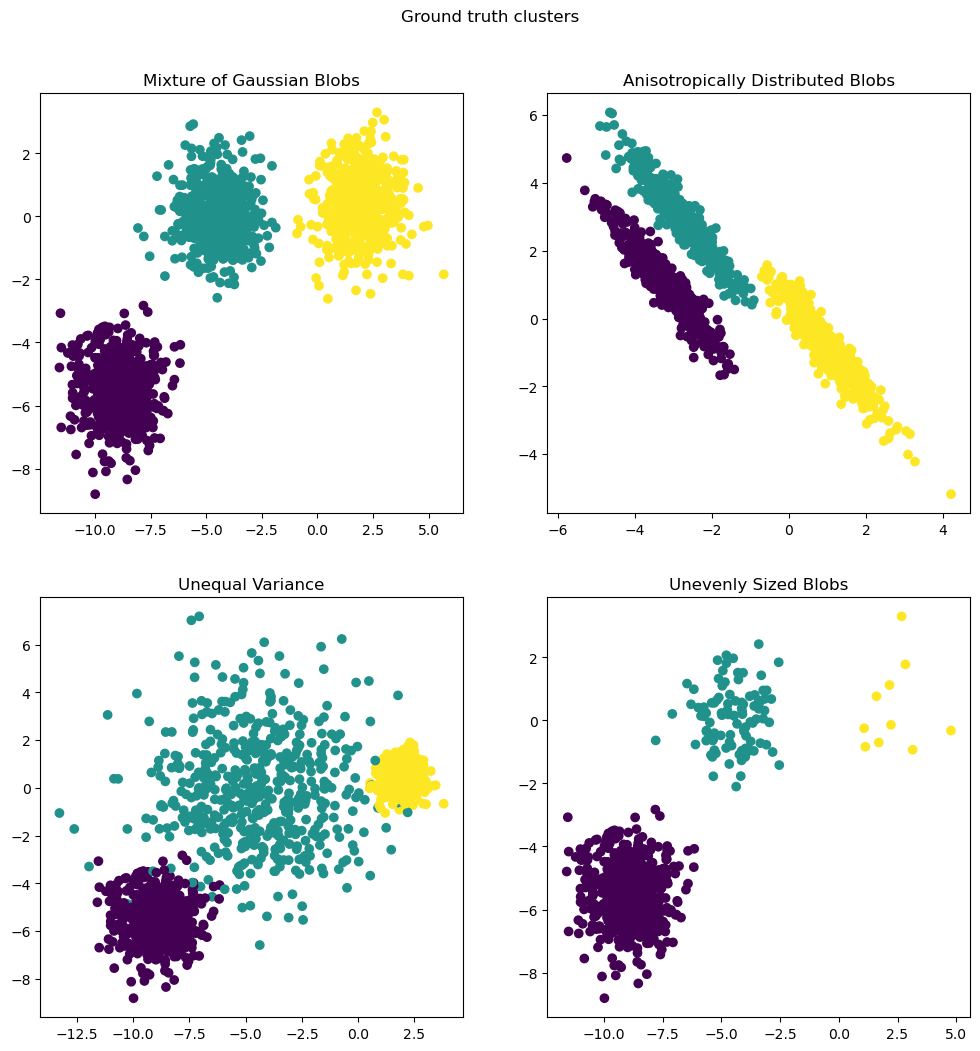

In [59]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 12))

axs[0, 0].scatter(X[:, 0], X[:, 1], c=y)
axs[0, 0].set_title("Mixture of Gaussian Blobs")

axs[0, 1].scatter(X_aniso[:, 0], X_aniso[:, 1], c=y)
axs[0, 1].set_title("Anisotropically Distributed Blobs")

axs[1, 0].scatter(X_varied[:, 0], X_varied[:, 1], c=y_varied)
axs[1, 0].set_title("Unequal Variance")

axs[1, 1].scatter(X_filtered[:, 0], X_filtered[:, 1], c=y_filtered)
axs[1, 1].set_title("Unevenly Sized Blobs")

plt.suptitle("Ground truth clusters").set_y(0.95)
plt.show()

c:\ProgramData\anaconda3\envs\machineV1\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
c:\ProgramData\anaconda3\envs\machineV1\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
c:\ProgramData\anaconda3\envs\machineV1\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
c:\ProgramData\anaconda3\envs\machineV1\lib\site-packages\sklearn\cluster\_kmeans.py:1436: 

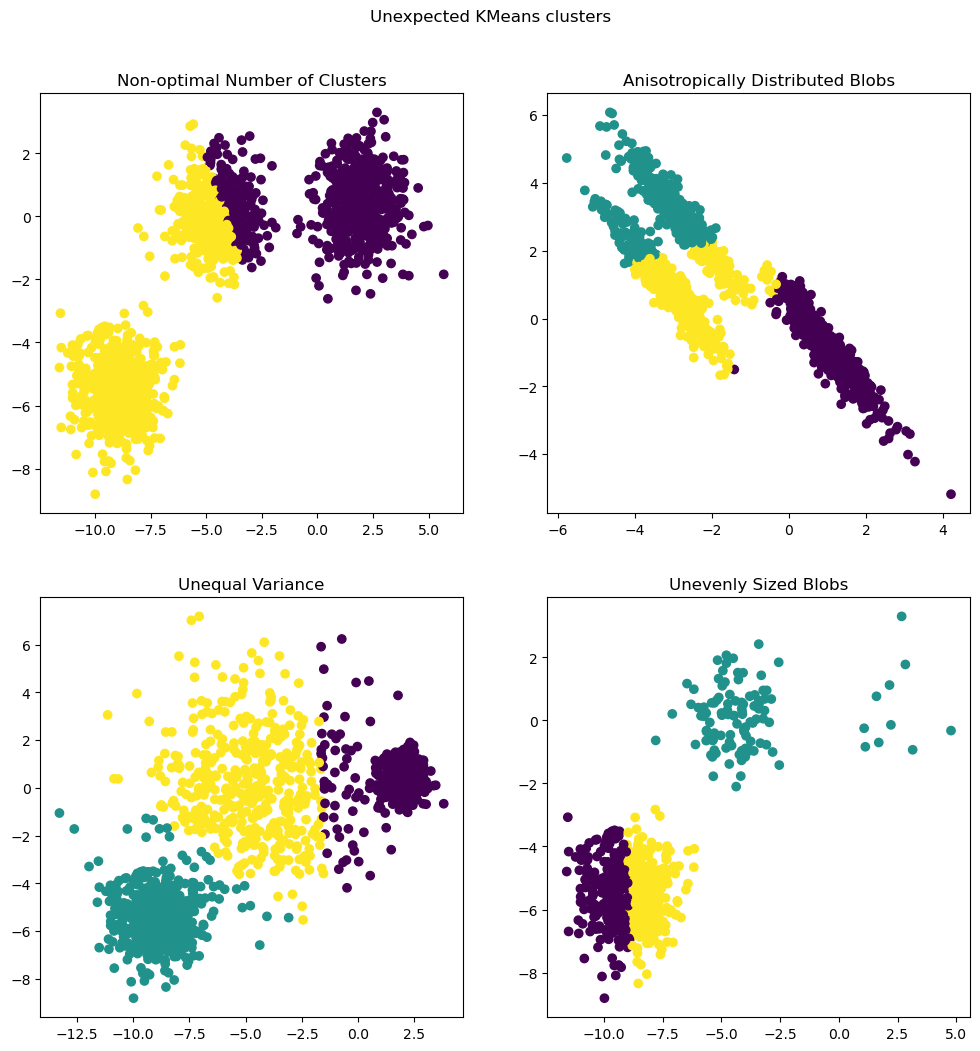

In [60]:
from sklearn.cluster import KMeans

common_params = {
    "n_init": "auto",
    "random_state": random_state,
}

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 12))

y_pred = KMeans(n_clusters=2, **common_params).fit_predict(X)
axs[0, 0].scatter(X[:, 0], X[:, 1], c=y_pred)
axs[0, 0].set_title("Non-optimal Number of Clusters")

y_pred = KMeans(n_clusters=3, **common_params).fit_predict(X_aniso)
axs[0, 1].scatter(X_aniso[:, 0], X_aniso[:, 1], c=y_pred)
axs[0, 1].set_title("Anisotropically Distributed Blobs")

y_pred = KMeans(n_clusters=3, **common_params).fit_predict(X_varied)
axs[1, 0].scatter(X_varied[:, 0], X_varied[:, 1], c=y_pred)
axs[1, 0].set_title("Unequal Variance")

y_pred = KMeans(n_clusters=3, **common_params).fit_predict(X_filtered)
axs[1, 1].scatter(X_filtered[:, 0], X_filtered[:, 1], c=y_pred)
axs[1, 1].set_title("Unevenly Sized Blobs")

plt.suptitle("Unexpected KMeans clusters").set_y(0.95)
plt.show()

c:\ProgramData\anaconda3\envs\machineV1\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


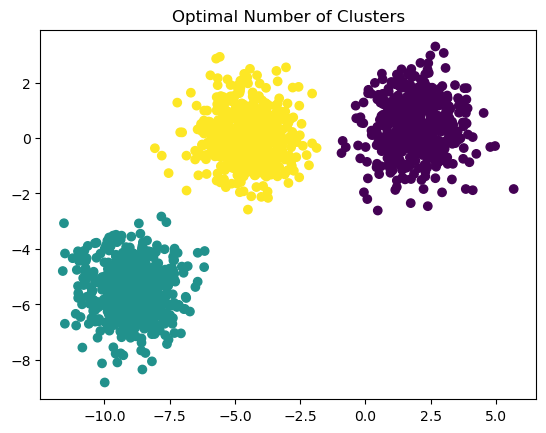

In [61]:
y_pred = KMeans(n_clusters=3, **common_params).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.title("Optimal Number of Clusters")
plt.show()

c:\ProgramData\anaconda3\envs\machineV1\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


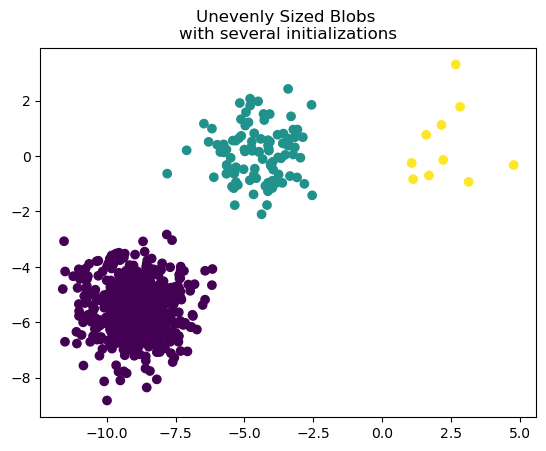

In [62]:
y_pred = KMeans(n_clusters=3, n_init=10, random_state=random_state).fit_predict(
    X_filtered
)
plt.scatter(X_filtered[:, 0], X_filtered[:, 1], c=y_pred)
plt.title("Unevenly Sized Blobs \nwith several initializations")
plt.show()

c:\ProgramData\anaconda3\envs\machineV1\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
c:\ProgramData\anaconda3\envs\machineV1\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


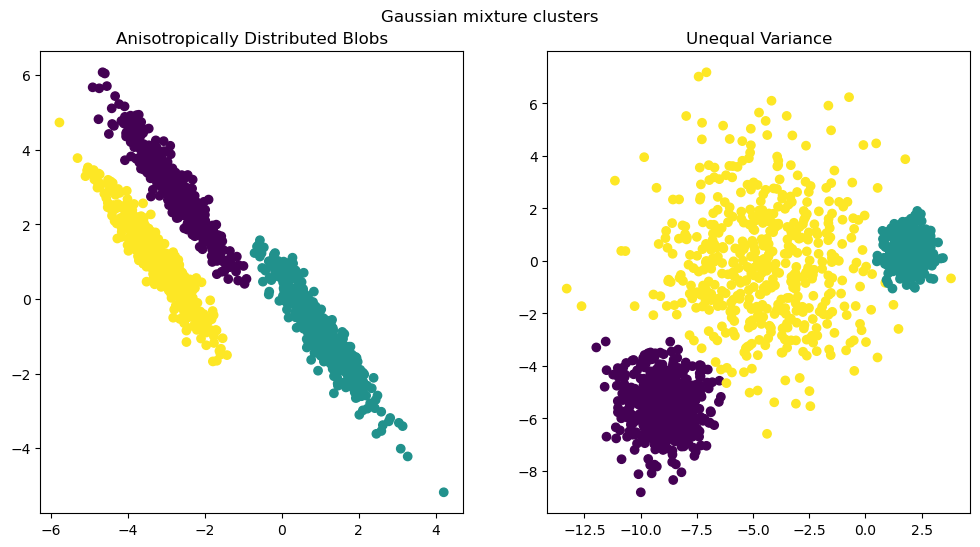

In [63]:
from sklearn.mixture import GaussianMixture

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

y_pred = GaussianMixture(n_components=3).fit_predict(X_aniso)
ax1.scatter(X_aniso[:, 0], X_aniso[:, 1], c=y_pred)
ax1.set_title("Anisotropically Distributed Blobs")

y_pred = GaussianMixture(n_components=3).fit_predict(X_varied)
ax2.scatter(X_varied[:, 0], X_varied[:, 1], c=y_pred)
ax2.set_title("Unequal Variance")

plt.suptitle("Gaussian mixture clusters").set_y(0.95)
plt.show()

## E-M Algorithm

c:\ProgramData\anaconda3\envs\machineV1\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
c:\ProgramData\anaconda3\envs\machineV1\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
c:\ProgramData\anaconda3\envs\machineV1\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
c:\ProgramData\anaconda3\envs\machineV1\lib\site-packages\sklearn\cluster\_kmeans.py:1436: 

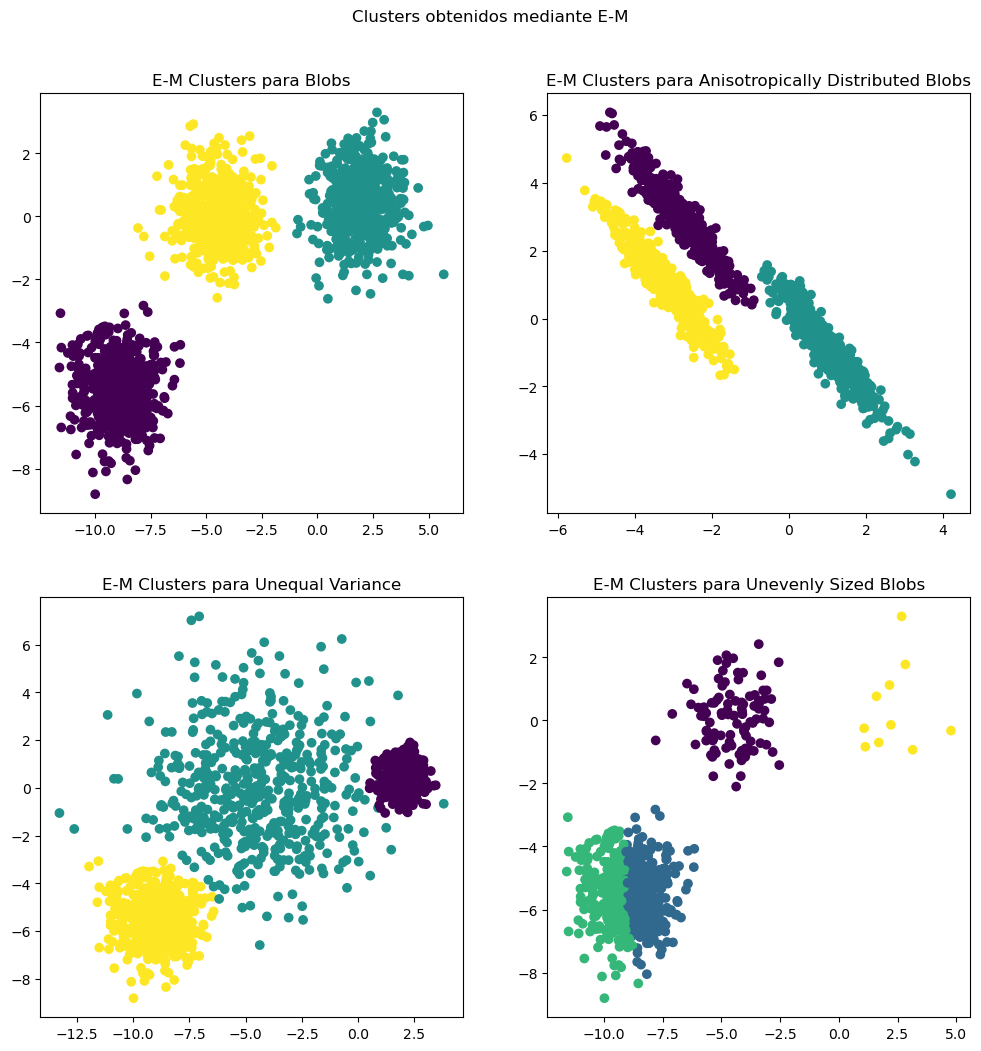

In [64]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

# Generar los datos
n_samples = 1500
random_state = 170
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]

X, y = make_blobs(n_samples=n_samples, random_state=random_state)
X_aniso = np.dot(X, transformation)  # Anisotropic blobs
X_varied, y_varied = make_blobs(
    n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5], random_state=random_state
)  # Unequal variance
X_filtered = np.vstack(
    (X[y == 0][:500], X[y == 1][:100], X[y == 2][:10])
)  # Unevenly sized blobs
y_filtered = [0] * 500 + [1] * 100 + [2] * 10

# E-M en los datos generados
blobs_gmm = GaussianMixture(n_components=3)
blobs_y_pred = blobs_gmm.fit_predict(X)

aniso_gmm = GaussianMixture(n_components=3)
aniso_y_pred = aniso_gmm.fit_predict(X_aniso)

varied_gmm = GaussianMixture(n_components=3)
varied_y_pred = varied_gmm.fit_predict(X_varied)

filtered_gmm = GaussianMixture(n_components=4)
filtered_y_pred = filtered_gmm.fit_predict(X_filtered)

# Visualización de los resultados
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 12))
axs[0, 0].scatter(X[:, 0], X[:, 1], c=blobs_y_pred)
axs[0, 0].set_title("E-M Clusters para Blobs")

axs[0, 1].scatter(X_aniso[:, 0], X_aniso[:, 1], c=aniso_y_pred)
axs[0, 1].set_title("E-M Clusters para Anisotropically Distributed Blobs")

axs[1, 0].scatter(X_varied[:, 0], X_varied[:, 1], c=varied_y_pred)
axs[1, 0].set_title("E-M Clusters para Unequal Variance")

axs[1, 1].scatter(X_filtered[:, 0], X_filtered[:, 1], c=filtered_y_pred)
axs[1, 1].set_title("E-M Clusters para Unevenly Sized Blobs")

plt.suptitle("Clusters obtenidos mediante E-M").set_y(0.95)
plt.show()


Make_blobs help us to make sntetic data
   - Blobs: create groupd of points using Gaussian distributions
   - Anistropically Distributed: Datast that are used to distributed in anistropically ay, that means are in differents scales and directions
   - Unequeal Variance: Group with different variance
   - Unevenly Sized Blobs: Groups of points belongs to

Then we create a visulization of the datasets.
K-Means with Non-Optimal number of clusters for the original data x.
Then is applied 3 clusters to the anistropically distributed data.
K-means with Multiple Initializations to the unevenly sized blobs of the data using differents initializations.
Gaussian Mixture Model (GMM), used to cluster the anistropically distributed and unequal variance data.


### SimpSOM I could not use it

In [65]:
import simpsom as sps

In [66]:
"""
net = sps.SOMNet(20, 20, X_filtered, topology='hexagonal', 
                init='PCA', metric='cosine',
                neighborhood_fun='gaussian', PBC=True,
                random_seed=32, GPU=False, CUML=False,
                output_path="./")

net.train(train_algo='batch', start_learning_rate=0.01, epochs=-1, 
    batch_size=-1)

net.plot_map_by_difference(show=True, print_out=True)
"""

'\nnet = sps.SOMNet(20, 20, X_filtered, topology=\'hexagonal\', \n                init=\'PCA\', metric=\'cosine\',\n                neighborhood_fun=\'gaussian\', PBC=True,\n                random_seed=32, GPU=False, CUML=False,\n                output_path="./")\n\nnet.train(train_algo=\'batch\', start_learning_rate=0.01, epochs=-1, \n    batch_size=-1)\n\nnet.plot_map_by_difference(show=True, print_out=True)\n'

### Minisom

In [67]:
from minisom import MiniSom

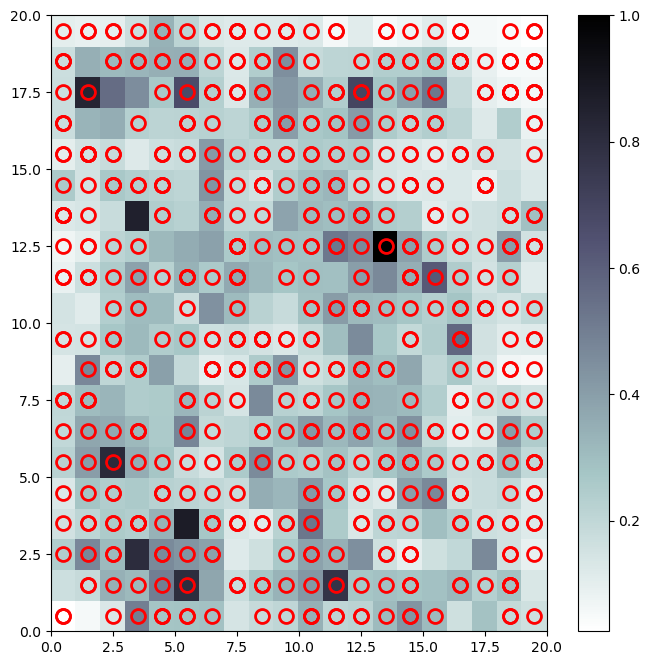

In [68]:

som = MiniSom(20, 20, X_filtered.shape[1], sigma=0.5, learning_rate=0.5)

som.random_weights_init(X_filtered)

som.train_random(X_filtered, num_iteration=100)

plt.figure(figsize=(8, 8))
plt.pcolor(som.distance_map().T, cmap='bone_r')
plt.colorbar()

for i, x in enumerate(X_filtered):
    w = som.winner(x)
    plt.plot(w[0] + 0.5, w[1] + 0.5, 'o', markerfacecolor='None',
             markeredgecolor='r', markersize=10, markeredgewidth=2)

plt.show()

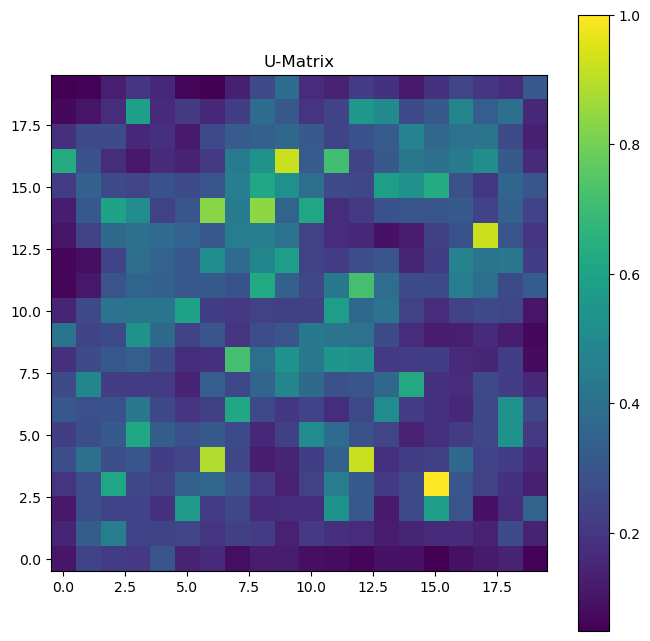

In [69]:
som = MiniSom(20, 20, X_filtered.shape[1], sigma=0.5, learning_rate=0.5)

som.random_weights_init(X_filtered)

som.train_random(X_filtered, num_iteration=100)

u_matrix = som.distance_map()

plt.figure(figsize=(8, 8))
plt.imshow(u_matrix, cmap='viridis', origin='lower')
plt.colorbar()

plt.title("U-Matrix")
plt.show()

So miniSom help us to understand the unction of a neural network, in this case we have the 20 x 20, that could represent the NN, each space is a neuron (red circle) that is activate and used, at the same time could represent groups of different topics or characteristics. 

### Conclusions
The implementation of the EM algorithm is easy, the solutions are easy to understand and is guaranteed that the value of likehood will increase after each iteration but is not perfect.
The principal disadvantages is that is slow, only cover a local optimum and consist in forward probabilities. The best ways to organice data is the correct application of the algorithms to implement and solve the problem. 

#### Bibliography
- https://towardsdatascience.com/solving-a-chicken-and-egg-problem-expectation-maximization-em-c717547c3be2
- https://www.analyticsvidhya.com/blog/2021/05/a-comprehensive-guide-to-expectation-maximization-algorithm/
- Federico Comitani. (2022). SimpSOM (v2.0.2). Zenodo. https://zenodo.org/record/7187332
